# 1.) Import the data from CCLE into a new Google Colab file

In [113]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [114]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [115]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/insurance.csv")

In [117]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

df.loc[df["smoker"] == "yes","smoker"] = 1.
df.loc[df["smoker"] == "no","smoker"] = 0.

df.loc[df["region"] == "southwest","region"] = 1.
df.loc[df["region"] == "southeast","region"] = 2.
df.loc[df["region"] == "northwest","region"] = 3.
df.loc[df["region"] == "northeast","region"] = 4.


### Do the same for smoker, region

In [118]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1.0,1.0,16884.92400
1,18,0.0,33.770,1,0.0,2.0,1725.55230
2,28,0.0,33.000,3,0.0,2.0,4449.46200
3,33,0.0,22.705,0,0.0,3.0,21984.47061
4,32,0.0,28.880,0,0.0,3.0,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [119]:
import numpy as np

In [120]:
data = np.array(df.iloc[:, :6])
target = np.array(df.iloc[:, -1])

In [122]:
cut = int((len(data) * .8) // 1)

In [123]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [124]:
from sklearn import preprocessing

In [125]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [126]:
in_data_scale = scaler.transform(in_data)

In [127]:
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [128]:
from sklearn.linear_model import LassoCV

modCV1 = LassoCV().fit(in_data_scale, in_target)

In [129]:
a1 = modCV1.alpha_
print(a1)

133.34880015958146


In [130]:
modCV2 = LassoCV().fit(out_data_scale, out_target)

In [131]:
a2 = modCV2.alpha_
print(a2)

118.95754102834297


# 5.) Run a lasso regression with that Lambda

In [132]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = a1).fit(in_data_scale, in_target)

In [133]:
mod2 = Lasso(alpha = a2).fit(out_data_scale, out_target)

# 6.) Visualize the coefficients 

In [134]:
coef1 = mod1.coef_

In [136]:
coef2 = mod2.coef_

In [139]:
X = ['b0', 'b1','b2','b3','b4','b5']

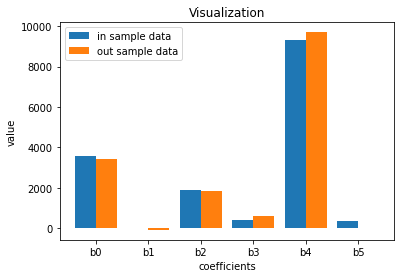

In [142]:
X_aixs = np.arange(len(X))
plt.bar(X_aixs - 0.2, coef1, 0.4, label = "in sample data")
plt.bar(X_aixs + 0.2, coef2, 0.4, label = "out sample data")

plt. xticks(X_aixs, X)
plt.xlabel("coefficients")
plt.ylabel("value")
plt.title("Visualization")
plt.legend()
plt.show()

# 7.) Interpret the coefficients

From the visualization graph, we can see that the in sample coefficient and out sample coefficient of the six parameters are similar. The coefficient of age is b0, which means if the age increases 1 year, the insurance fee will also increase around 3500 dollars. And b2 is the coefficient for bmi, which means the bmi increases 1 unit, the insurance fee will increase around 2000 dollars. 

# 8.) Compare in and out of sample MSE’s

In [143]:
mod1.predict(np.array(in_data_scale))

array([24933.78011265,  3864.47297708,  6815.10290666, ...,
       12177.79520243, 11741.14195836, 12360.55112834])

In [144]:
mod2.predict(np.array(out_data_scale))

array([ 3.42602387e+04,  1.41187813e+04,  3.96599668e+03,  1.19758729e+04,
        9.24608851e+03,  6.41342410e+03,  1.07486276e+04,  2.38384844e+03,
        2.99754093e+04,  1.62578417e+04,  1.35474464e+03,  6.06385352e+03,
        5.11842683e+03,  7.17362831e+03,  1.43878057e+04,  3.08332948e+04,
        1.14479515e+04,  1.27053687e+04,  1.68984198e+04,  9.60654064e+03,
        3.59079528e+04,  1.15249989e+04,  6.35262469e+03,  2.79637925e+04,
        1.34528337e+04,  5.04962495e+03,  3.72940079e+04,  4.96791060e+03,
        1.11203392e+04,  6.06321747e+03,  2.81634940e+04,  1.23220246e+04,
        8.70539686e+03,  1.43204597e+04,  7.37122785e+03,  1.17115887e+04,
        1.01115864e+04,  1.02089631e+04,  5.27724423e+03,  7.90099067e+03,
        1.25220107e+04,  3.58792029e+04,  3.43038289e+04,  5.43919056e+03,
        2.40431342e+03,  1.30562606e+04,  1.07314830e+04,  3.07328461e+04,
        3.28990855e+04,  3.99257262e+03,  2.85069591e+04,  1.30478618e+04,
        3.88395111e+04,  